# Universidade do Estado do Amazonas - Microeconomia II
### Modelo do mercado com demandas interrelacionadas e um monopolista

Prof. Bruno de Melo Ruas


## Sistemas de Equações

- Curvas de Demanda Inversa Linear:  

  $ p_1(y_1) = 100 - y_1 - y_2$

  $ p_2(y_2) = 50 - y_2/2 - y_1$

  $ p(y_1 + y_2) = 150 - 2y_1 - y_2 $

- Funções de Receita:

  $ r(y_1) = p_1(y_1)y_1 = 100y_1 - y_{1}^{2} - y_2y_1$

  $ r(y_2) = p_2(y_2)y_2 = 50y_2 - y_{2}^2/2 - y_1y_2$

  $ r(y_1 + y_2) = p_1(y_1)y_1 + p_2(y_2)y_2 = 100y_1 + 50y_2 - y_{1}^{2} - y_{2}^2/2 - 2y_1y_2 $

- Função Receita Marginal: 

  $ RMa_1(y_1) = 100 - 2y_1 - y_2$

  $ RMa_2(y_2) = 50 - y_2^2 - y_1$

- Função Custo Marginal: 

  $ CMa(y1) = 20 $

  $ CMa(y_2) = 0 $



In [30]:
# Modulos usados
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

pd.options.mode.chained_assignment = None  # default='warn'

plt.style.use('dark_background')

# Funcoes do modelo
def dem1(y1,y2):
	return 100 - y1 - y2

def dem2(y1,y2):
	return 100 - y2 - y1

def rec1(y1,y2):
	return dem1(y1,y2) * y1

def rec2(y1,y2):
	return dem2(y1,y2) * y2

def rma1(y1,y2):
	return 100 - 2*y1 - y2

def rma2(y1,y2):
	return 100 - 2*y2 - y1

def custo1(cf1,cv1,y1):
	return cf1 + cv1 * y1

def custo2(cf2,cv2,y2):
	return cf2 + cv2 * y2

def lucro1(y1,y2,cf1,cv1):
	return rec1(y1,y2) - custo1(cf1,cv1,y1)

def lucro2(y1,y2,cf2,cv2):
	return rec2(y1,y2) - custo2(cf2,cv2,y2)

def lucro(y1,y2,cf1,cf2,cv1,cv2):
	return lucro1(y1,y2,cf1,cv1) + lucro2(y1,y2,cf2,cv2)

In [58]:
# Montando todas as cestas dos dois bens

cestas = pd.DataFrame()
for i in range(0,101,1):
	for j in range(0,101,1):
		cesta = [[i,j]]
		cestas = cestas.append(cesta)

cestas.columns = ['y1','y2']

In [29]:
# Dados do modelo

data = pd.DataFrame()
data['dem1'] = cestas['y1']
data['dem2'] = cestas['y2']
data['dem1'] = dem1(data['dem2'],x)
#data['dem2'] = data['dem2'].apply(lambda x: 0 if x <= 0 else x)
#data['dem1'] = data['dem1'].apply(lambda x: 0 if x <= 0 else x)

data['lucro'] = lucro(data['dem1'],data['dem2'],0,0,1,1)
#data = data[data['lucro'] >= 0]

data

,dem1,dem2,lucro
0,-100.000000,300.000000,-20200.000000
1,-99.799800,299.599600,-20139.779820
2,-99.599600,299.199199,-20079.639800
3,-99.399399,298.798799,-20019.579940
4,-99.199199,298.398398,-19959.600241
...,...,...,...
995,99.199199,-98.398398,78.637997
996,99.399399,-98.798799,59.098738
997,99.599600,-99.199199,39.479319
998,99.799800,-99.599600,19.779740


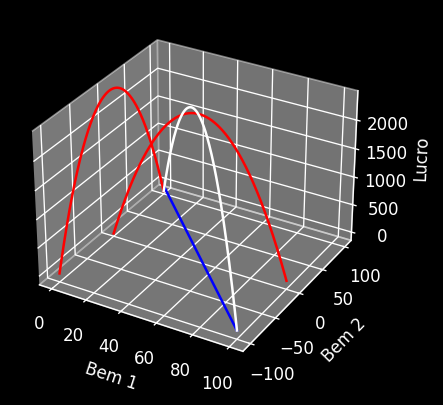

In [28]:
# Gerando o gráfico
fig = plt.figure(dpi=120)

ax = plt.axes(projection='3d')
ax.grid(color='gray',linewidth=.2)

# plot labels
ax.set_zlabel('Lucro')
ax.set_xlabel('Bem 1')
ax.set_ylabel('Bem 2')

# data from a 3d line plot
zline = data['lucro']
xline = data['dem1']
yline = data['dem2']

# shadows lines
ax.plot(xline,yline, zs=0, zdir='z', color='blue')
ax.plot(xline,zline, zs=0, zdir='y', color='red')
ax.plot(yline,zline, zs=0, zdir='x', color='red')

# set the view
#ax.azim = 50
#ax.dist = 5
#ax.elev = 8

ax.plot3D(xline,yline,zline, 'white')

plt.show()


In [55]:
data

,dem1,dem2,lucro
0,0.000000,50.000000,1200.000000
1,0.150150,49.774775,1199.944652
2,0.300300,49.549550,1199.928758
3,0.450450,49.324324,1199.952317
4,0.600601,49.099099,1200.015331
...,...,...,...
571,85.735736,0.000000,1051.485720
572,85.885886,0.000000,1040.431422
573,86.036036,0.000000,1029.332035
574,86.186186,0.000000,1018.187557
